In [ ]:
from PIL import Image
import os, glob, sys
import numpy as np
from sklearn.model_selection import train_test_split # 섞어줌
from keras.utils import np_utils

In [ ]:
# 모델 구성

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from tensorflow.keras.layers import concatenate, Input
from keras.models import Model

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# CNN에서 분류한 데이터를 가져온다.
X_train, X_test, y_train, y_test = np.load('/content/drive/MyDrive/git/4_categorical_100.npy', allow_pickle=True)

# 정규화
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [ ]:
print(X_train.shape)
print(X_train.shape[0])
print(np.bincount(y_train))
print(np.bincount(y_test))

(9095, 100, 100, 3)
9095
[2750 1484 3175 1686]
[348 184 299 180]


In [ ]:
# functional 형식

input_img = Input(shape = X_train.shape[1:])
tower_1 = Conv2D(64, (1,1), padding="same", activation="relu")(input_img)
tower_1 = Conv2D(64, (3,3), padding="same", activation="relu")(tower_1)
tower_2 = Conv2D(64, (1,1), padding="same", activation="relu")(input_img)
tower_2 = Conv2D(64, (3,3), padding="same", activation="relu")(tower_2)
tower_2 = Conv2D(64, (3,3), padding="same", activation="relu")(tower_2)
tower_3 = AveragePooling2D((3,3), strides = (1,1), padding = "same")(input_img)
tower_3 = Conv2D(64, (1,1), padding="same", activation="relu")(tower_3)

output1 = keras.layers.concatenate([tower_1, tower_2, tower_3 ], axis = 3)

tower_4 = Conv2D(64, (1,1), padding="same", activation="relu")(output1)
tower_4 = Conv2D(64, (3,3), padding="same", activation="relu")(tower_4)
tower_5 = Conv2D(64, (1,1), padding="same", activation="relu")(output1)
tower_5 = Conv2D(64, (3,3), padding="same", activation="relu")(tower_5)
tower_5 = Conv2D(64, (3,3), padding="same", activation="relu")(tower_5)
tower_6 = AveragePooling2D((3,3), strides = (1,1), padding = "same")(output1)
tower_6 = Conv2D(64, (1,1), padding="same", activation="relu")(tower_6)

output2 = keras.layers.concatenate([tower_4, tower_5, tower_6 ], axis = 3)

tower_7 = Conv2D(64, (1,1), padding="same", activation="relu")(output2)
tower_7 = Conv2D(64, (3,3), padding="same", activation="relu")(tower_7)
tower_8 = Conv2D(64, (1,1), padding="same", activation="relu")(output2)
tower_8 = Conv2D(64, (3,3), padding="same", activation="relu")(tower_8)
tower_8 = Conv2D(64, (3,3), padding="same", activation="relu")(tower_8)
tower_9 = AveragePooling2D((3,3), strides = (1,1), padding = "same")(output2)
tower_9 = Conv2D(64, (1,1), padding="same", activation="relu")(tower_9)

output3 = keras.layers.concatenate([tower_7, tower_8, tower_9 ], axis = 3)

output = GlobalAveragePooling2D()(output3)
out = Dense(4, activation="softmax")(output)

In [ ]:
model = Model(inputs = input_img, outputs = out)
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_2 (Conv2D)              (None, 100, 100, 64  256         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, 100, 100, 64  256         ['input_1[0][0]']                
                                )                                                             

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model_dir = '/content/drive/MyDrive/git/model_functional'
if not os.path.exists(model_dir) :
  os.mkdir(model_dir)
model_path = model_dir + "/4_functional_100.model"

checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train, callbacks=[checkpoint, early_stopping], batch_size=50, validation_data = (X_test,y_test), epochs = 100)

Epoch 1/100
182/182 [==============================] - ETA: 0s - loss: 1.3168 - accuracy: 0.3557
Epoch 00001: val_loss improved from inf to 1.27604, saving model to /content/drive/MyDrive/git/model_functional/4_functional_100.model
INFO:tensorflow:Assets written to: /content/drive/MyDrive/git/model_functional/4_functional_100.model/assets
182/182 [==============================] - 111s 547ms/step - loss: 1.3168 - accuracy: 0.3557 - val_loss: 1.2760 - val_accuracy: 0.4095
Epoch 2/100
182/182 [==============================] - ETA: 0s - loss: 1.2607 - accuracy: 0.3980
Epoch 00002: val_loss improved from 1.27604 to 1.23124, saving model to /content/drive/MyDrive/git/model_functional/4_functional_100.model
INFO:tensorflow:Assets written to: /content/drive/MyDrive/git/model_functional/4_functional_100.model/assets
182/182 [==============================] - 99s 543ms/step - loss: 1.2607 - accuracy: 0.3980 - val_loss: 1.2312 - val_accuracy: 0.4273
Epoch 3/100
182/182 [========================

<Figure size 432x288 with 0 Axes>

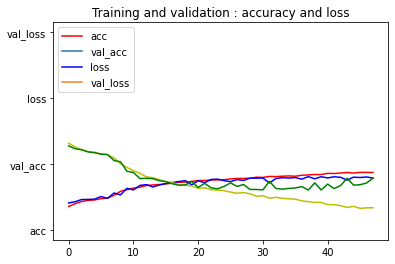

<Figure size 432x288 with 0 Axes>

In [ ]:
# 정확도와 loss 차트 그리기
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

# history의 train과 test의 정확도와 loss를 각각 가져온다.
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # 에포크

# 그래프로 표시
plt.plot(epochs, acc, 'r', "acc")
plt.plot(epochs, val_acc, 'b', "val_acc")
plt.plot(epochs, loss, 'y', "loss")
plt.plot(epochs, val_loss, 'g', "val_loss")
plt.legend(['acc','val_acc','loss','val_loss'], loc = 'upper left')

plt.title('Training and validation : accuracy and loss')
plt.figure()


